# Design of Experiments

N. BARTOLI (ONERA/DTIS/M2CI)

This tutorial describes how to use the pyDOE2 (updated version from pyDOE) library to build a Design of Experiments


<div class="alert alert-info fade in" id="d110">
<p>Two means to have a design of experiments</p>
 <ol> - create a DOE wiyh PyDOE2 toolbox (only for pyther version < 3.12 </ol>
  <ol>  - download a database (DOE files) </ol>


</div>

**October 2025**

# 1. Installation of pyDOE if python version < 3.12 otherwise use

The package `pyDOE2` which handles the creation of the domain of experiments.

In [1]:
!python --version

Python 3.12.11


**If you use python >= 3.12 there is an issue with pydoe2**

*ModuleNotFoundError: No module named 'imp'*

 The reason being "imp" has been completely removed from recent python versions.

 Two solutions:

*   Either downgrade your python version to an older version i.e. <3.12
*   Find the location where Module imp is imported and replace it with importlib

**or use lhs from scipy**

In [2]:
!pip install pyDOE2

<div class="alert alert-info fade in" id="d110">
For Google Colab:

!pip install pyDOE2

in a dedicated code cell

<div>

# 2. Construction of the training points for a 2D example

## 2.1 Case 1: the user doesn't have any sample

[[-1.         -1.        ]
 [-1.         -0.66666667]
 [-1.         -0.33333333]
 [-1.          0.        ]
 [-1.          0.33333333]
 [-1.          0.66666667]
 [-1.          1.        ]
 [-0.66666667 -1.        ]
 [-0.66666667 -0.66666667]
 [-0.66666667 -0.33333333]
 [-0.66666667  0.        ]
 [-0.66666667  0.33333333]
 [-0.66666667  0.66666667]
 [-0.66666667  1.        ]
 [-0.33333333 -1.        ]
 [-0.33333333 -0.66666667]
 [-0.33333333 -0.33333333]
 [-0.33333333  0.        ]
 [-0.33333333  0.33333333]
 [-0.33333333  0.66666667]
 [-0.33333333  1.        ]
 [ 0.         -1.        ]
 [ 0.         -0.66666667]
 [ 0.         -0.33333333]
 [ 0.          0.        ]
 [ 0.          0.33333333]
 [ 0.          0.66666667]
 [ 0.          1.        ]
 [ 0.33333333 -1.        ]
 [ 0.33333333 -0.66666667]
 [ 0.33333333 -0.33333333]
 [ 0.33333333  0.        ]
 [ 0.33333333  0.33333333]
 [ 0.33333333  0.66666667]
 [ 0.33333333  1.        ]
 [ 0.66666667 -1.        ]
 [ 0.66666667 -0.66666667]
 

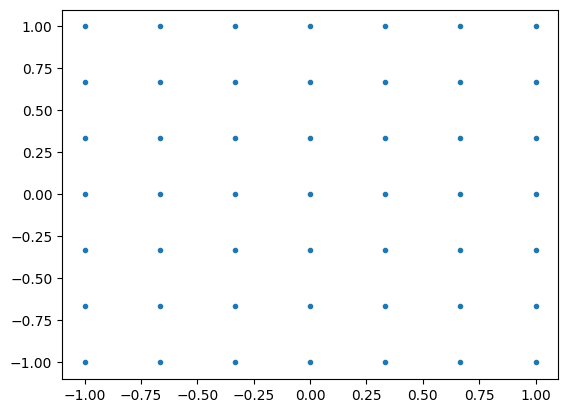

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# construction of both test and training points (the user doesn't have any validation point)
x_min=[-1 , -1]
x_max=[1 , 1]
num=7
# grid pattern
x_array = np.linspace(x_min[1], x_max[1], num)
y_array = np.linspace(x_min[1], x_max[1], num)

mapping_array = []

for i in range(len(x_array)):
    for j in range(len(y_array)):
        mapping_array.append([x_array[i], y_array[j]])
x_train_and_test=np.array(mapping_array);

print(x_train_and_test)
plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
plt.show()

In [4]:
## To replace pyDOE if version python >= 3.12
import numpy as np
from scipy.stats import qmc

# Define the number of samples and dimensions
n_samples = 49
n_dims = 2

# Create a Latin Hypercube sampler
sampler = qmc.LatinHypercube(d=n_dims)

# Generate samples in [0, 1]
samples = sampler.random(n=n_samples)

# Scale samples to your desired range, e.g., [0, 10] for each dimension
lower_bounds = np.array([0, 0])
upper_bounds = np.array([1, 1])
x_train_and_test= qmc.scale(samples, lower_bounds, upper_bounds)

In [5]:
## If Python version < 3.12

import sys

if sys.version_info < (3, 12):
    !pip install pyDOE2
    from pyDOE2 import lhs
    import imp  # Deprecated module, but still available
    print("Using the 'imp' module (deprecated) in pydOE.")

    dim = 2 # dimension of the problem
    #DOE with classical LHS
    x_train_and_test = lhs(dim, samples=49)
    print(x_train_and_test)
    plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
    plt.show()
    #DOE with classical LHS criterion='center'
    x_train_and_test = lhs(dim, samples=49, criterion='center')
    #print(x_train_and_test)
    plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
    plt.show()
    #DOE with classical LHS criterion='centermaximin'
    x_train_and_test = lhs(dim, samples=49, criterion='centermaximin')
    #print(x_train_and_test)
    plt.plot(x_train_and_test[:,0],x_train_and_test[:,1],'.')
    plt.show()


The outputs `y` are created by applying the function we want to model.

  

To split the training set and the test set we can use the function:

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x_train_and_test, test_size=0.2, random_state=12)
print('X_train', x_train_and_test.shape)
print('X_train', x_train.shape)
print('X_test', x_test.shape)

X_train (49, 2)
X_train (39, 2)
X_test (10, 2)


## 2.2 Define the Branin function and visualize it

**Branin function**
$$
\begin{array}{ccc}
f(x_1,x_2) = {\left(x_{2} - \frac{5.1}{4\pi^2} {x_{1}}^2 + \frac{5}{\pi} x_{1} - 6\right)}^2 + 10 \left[(1 - \frac{1}{8\pi}) \cos(x_{1}) + 10\right]
\end{array}
$$

$$x_{1} \in [-5, 10] \hspace{2mm} x_{2} \in [0, 15]$$

In [7]:
def branin(x):
    """
    This function is the Branin function
    Input:
    --------
    x : 2D array_like (x in [0, 1])
    Output
    --------
    y : array_like
    values of Branin function for each x
    """
    if x.shape[1] != 2:
        raise UncorrectInputDimension()
    #vector x in [0, 1] =>  x1 in [-5, 10] and x2 in [0 15]
    x1 = 15 * x[:, 0] - 5
    x2 = 15 * x[:, 1]
    return (x2 - 5.1 / (4. * (np.pi)**2) * x1**2 + 5. / np.pi * x1 - 6)**2 + \
        10. * (1. - 1. / (8. * np.pi)) * np.cos(x1) + 10


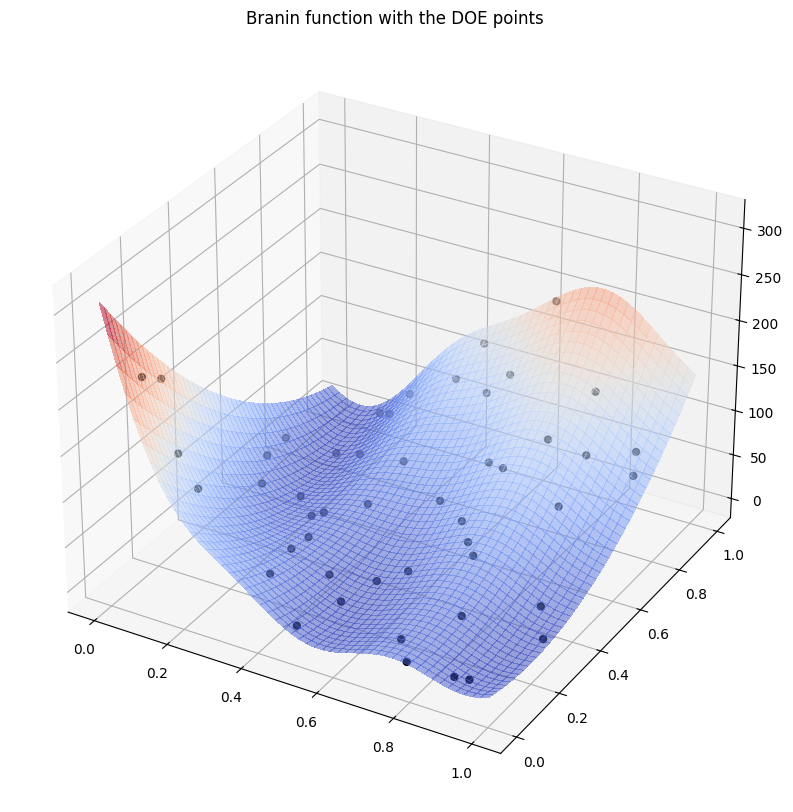

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

y_train_and_test = branin(x_train_and_test) # branin's function = function to model
x = np.linspace(0,1,50)
res = []
for x0 in x:
    for x1 in x:
        res.append(branin(np.array([[x0,x1]])))
res = np.array(res)
res = res.reshape((50,50)).T
X,Y = np.meshgrid(x,x)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_train_and_test[:,0],x_train_and_test[:,1],y_train_and_test,zdir='z',marker = '.',c='k',s=100)
surf = ax.plot_surface(X, Y, res, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.5)
plt.title('Branin function with the DOE points')

plt.show()

## 2.3 Case 2: the user do have sample of points

If the user has a file with points, he can also use the function 'construct_sample' to construct the samples :

<div class="alert alert-warning fade in" id="d107"><h4 id="this-is-an-example-alert-message-">
    
To read files from google colab

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Train.csv

xy_train = pd.read_csv(url_name, header=None)

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Valid.csv

xy_valid = pd.read_csv(url_name, header=None)

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Predict.csv

xy_to_predict = pd.read_csv(url_name, header=None)

</div>

In [9]:
import pandas as pd
#To read files from google colab

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Train.csv'

xy_train = pd.read_csv(url_name, header=None)

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Valid.csv'

xy_valid = pd.read_csv(url_name, header=None)

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/07_DESIGN_EXPERIMENTS/BRANIN_Predict.csv'

xy_to_predict = pd.read_csv(url_name, header=None)

#or from local files
import pandas as pd

file_name = "BRANIN_Train.csv"
xy_train = pd.read_csv(file_name, header=None)


file_name = "BRANIN_Valid.csv"
xy_valid = pd.read_csv(file_name, header=None)


file_name = "BRANIN_Predict.csv"
xy_to_predict = pd.read_csv(file_name, header=None)

NB: the form of the `csv` file is very specific. Open one to see how the data is filled in.  
Every point is in the first column. One row corresponds to one point. Each component of the point is separated by a comma without space.

We have so far constructed the training points and the validation points.